In [1]:
# importing libraries
import pandas as pd

from IPython.display import display
from pathlib import Path
from warnings import simplefilter
simplefilter('ignore')

In [2]:
# Load dataset
data_dir = Path("../input/dl-course-data/")
red_wine = pd.read_csv(data_dir / "red-wine.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# create trining and validation splits
df_train = red_wine.sample(frac = 0.7, random_state = 0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [4]:
# scale to [0,1]
max_ = df_train.max(axis = 0)
min_ = df_train.min(axis = 0)
df_train = (df_train - min_) / (max_ - min_)
df_Valid = (df_valid - min_) / (max_ - min_)

In [5]:
# split features and target
X_train = df_train.drop('quality', axis = 1)
X_valid = df_train.drop('quality', axis = 1)
y_train = df_train.quality
y_valid = df_train.quality

In [6]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692


In [7]:
X_valid.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692


In [8]:
y_train.head()

1109    0.6
1032    0.4
1002    0.8
487     0.6
979     0.4
Name: quality, dtype: float64

In [9]:
y_valid.head()

1109    0.6
1032    0.4
1002    0.8
487     0.6
979     0.4
Name: quality, dtype: float64

In [10]:
X_train.shape

(1119, 11)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, # minimum amount of change to count as an improvement
    patience = 20, # how many epochs to wait before stopping
    restore_best_weights = True)

model = keras.Sequential([
        layers.Dense(units = 512 , activation ='relu' , input_shape = [11]),
        layers.Dense(units = 512, activation = 'relu'),
        layers.Dense(units = 512, activation = 'relu'),
        layers.Dense(units = 1)
    ])

model.compile(optimizer = 'adam', loss = 'mae')

In [15]:
history = model.fit(
    X_train, y_train,
    batch_size = 256,
    epochs = 500, 
    validation_data = (X_valid, y_valid),
    callbacks = [early_stopping], 
    verbose = 0,
)

 Minimum Validation loss: 0.04592819884419441
 Maximum Validation loss: 0.13332787156105042


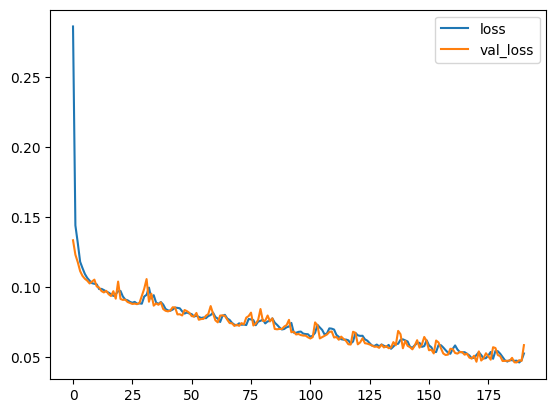

In [22]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
print(f" Minimum Validation loss: {history_df['val_loss'].min()}")
print(f" Maximum Validation loss: {history_df['val_loss'].max()}")